In [1]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")

df = pd.read_csv(f"{path}/TMDB_movie_dataset_v11.csv")
df = df.head(5000)
df.head(5)


c:\Users\yuvra\miniconda3\envs\MOVIE\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [2]:
# data cleaning remove redundunt columns
redundant_cols = ["id","vote_count","status","release_date","revenue","runtime","backdrop_path","budget","homepage","original_title","poster_path"]
df.drop(redundant_cols, axis=1, inplace=True)
df.head()

# first remove duplicates
df.drop_duplicates(inplace=True)

# drop columns having tite = null
df = df.dropna(subset=["title"])

# replace null overview to it's title
df = df.fillna({"overview": df["title"]})
df = df.fillna({"tagline": df["title"]})
df = df.dropna(subset=["genres"])
df = df.fillna({"production_countries": 'unitedstatesofamerica'})
df = df.fillna({"spoken_languages": 'English'})
df = df.fillna({"keywords": df["title"]})

# replace false with 0 and True with 1 in adult column
df["adult"] = df["adult"].astype(int)

df.head()

,title,vote_average,adult,imdb_id,original_language,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,Inception,8.364,0,tt1375666,en,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,Interstellar,8.417,0,tt0816692,en,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,The Dark Knight,8.512,0,tt0468569,en,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,Avatar,7.573,0,tt0499549,en,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,The Avengers,7.710,0,tt0848228,en,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [3]:
import re

# convert string to list of string in spoken_languages and generes and keywords
# Function to clean and normalize categorical values
def clean_list_column(col_values):
    return [re.sub(r"[^a-zA-Z0-9\s-]", "", val).strip().lower() for val in col_values]

# Apply to all relevant columns
for col in ["spoken_languages", "genres", "keywords", "production_companies", "production_countries"]:
    df[col] = df[col].astype(str).apply(lambda x: x.split(",") if ',' in x else [x])
    df[col] = df[col].apply(clean_list_column)


In [4]:
from sklearn.preprocessing import MultiLabelBinarizer

def encode_top_n_categorical(df, column_name, top_n):
    """
    Converts a categorical column with multiple values per row into a one-hot encoded DataFrame.
    Keeps only the top N most frequent categories.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the categorical column to encode.
    - top_n (int): The number of top categories to keep.

    Returns:
    - pd.DataFrame: One-hot encoded DataFrame with only the top N categories.
    """
    mlb = MultiLabelBinarizer()

    # Perform MultiLabelBinarization
    encoded_df = pd.DataFrame(
        mlb.fit_transform(df[column_name]),
        columns=mlb.classes_,
        index=df.index
    )

    # Compute sum for each encoded column
    column_sums = encoded_df.sum(axis=0)

    # Get the top N most common columns
    top_columns = column_sums.nlargest(top_n).index
    encoded_df = encoded_df[top_columns]

    return encoded_df

# Apply encoding with top N selection
genre_encoded = encode_top_n_categorical(df, "genres", 10)
language_encoded = encode_top_n_categorical(df, "spoken_languages", 10)
keyword_encoded = encode_top_n_categorical(df, "keywords", 50)
production_company_encoded = encode_top_n_categorical(df, "production_companies", 20)
production_country_encoded = encode_top_n_categorical(df, "production_countries", 10)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text_column(df, column_name, max_features=500):
    """
    Converts a text column into a numerical matrix using TF-IDF.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the text column to vectorize.
    - max_features (int): The number of most important words to keep.

    Returns:
    - pd.DataFrame: A DataFrame where each column represents a word's importance in the text.
    """
    tfidf = TfidfVectorizer(max_features=max_features, stop_words="english")

    # Transform the text column into a TF-IDF matrix
    tfidf_matrix = tfidf.fit_transform(df[column_name].fillna(""))  # Fill NaN with empty string

    # Convert to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out(), index=df.index)

    return tfidf_df

overview_encoded = vectorize_text_column(df, "overview", max_features=500)
tagline_encoded = vectorize_text_column(df, "tagline", max_features=200)


In [6]:
# Concatenate all the feature matrices
final_feature_matrix = pd.concat([
    genre_encoded,
    language_encoded,
    keyword_encoded,
    production_company_encoded,
    production_country_encoded,
    overview_encoded,
    tagline_encoded
], axis=1)

print(final_feature_matrix.shape)
print(final_feature_matrix.head(5))

(5000, 800)
   drama  comedy  thriller  action  adventure  romance  crime  \
0      0       0         0       1          1        0      0   
1      1       0         0       0          1        0      0   
2      1       0         1       1          0        0      1   
3      0       0         0       1          1        0      0   
4      0       0         0       1          1        0      0   

   science fiction  horror  fantasy  ...  way  weapon   welcome  woman  won  \
0                1       0        0  ...  0.0     0.0  0.000000    0.0  0.0   
1                1       0        0  ...  0.0     0.0  0.000000    0.0  0.0   
2                0       0        0  ...  0.0     0.0  0.607659    0.0  0.0   
3                1       0        1  ...  0.0     0.0  0.000000    0.0  0.0   
4                1       0        0  ...  0.0     0.0  0.000000    0.0  0.0   

      world  worlds  wrong  year  years  
0  0.000000     0.0    0.0   0.0    0.0  
1  0.000000     0.0    0.0   0.0    0.

In [7]:
final_df = pd.concat([df[['title']], final_feature_matrix,df[['imdb_id']]], axis=1)
final_feature_matrix= final_feature_matrix.to_numpy()
final_df.head()

,title,drama,comedy,thriller,action,adventure,romance,crime,science fiction,horror,...,weapon,welcome,woman,won,world,worlds,wrong,year,years,imdb_id
0,Inception,0,0,0,1,1,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,tt1375666
1,Interstellar,1,0,0,0,1,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,tt0816692
2,The Dark Knight,1,0,1,1,0,0,1,0,0,...,0.0,0.607659,0.0,0.0,0.460148,0.0,0.0,0.0,0.0,tt0468569
3,Avatar,0,0,0,1,1,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,tt0499549
4,The Avengers,0,0,0,1,1,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,tt0848228


In [8]:
print(final_feature_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
class MultinomialNaiveBayes:

    def __init__(self):
        self.classes = []
        self.alpha = 0.00000000000000000001
        self.class_log_prior = {}
        self.feature_log_prob = {}

    def fit(self, X, y, alpha=0.00000000000000000001):
        self.classes = np.unique(y)
        self.alpha = alpha
        self.class_log_prior = {}
        self.feature_log_prob = {}

        for c in self.classes:
            X_c = X[y == c]
            total_count = X_c.sum()
            feature_count = X_c.sum(axis=0)
            
            # Apply Laplace smoothing
            smoothed_fc = feature_count + alpha
            smoothed_total = total_count + alpha * X.shape[1]

            self.feature_log_prob[c] = np.log(smoothed_fc / smoothed_total)
            self.class_log_prior[c] = np.log(X_c.shape[0] / X.shape[0])

    def predict_log_proba(self, X):
        log_probs = []
        for x in X:
            class_log_prob = {}
            for c in self.classes:
                logp = self.class_log_prior[c] + np.sum(x * self.feature_log_prob[c])
                class_log_prob[c] = logp
            log_probs.append(class_log_prob)
        return log_probs



In [10]:
def recommend_movies(favorite_movie, df, X, expected_language:None, genre_filter:None, top_n = 10):

    if(isinstance(X, pd.DataFrame)):
        X = X.to_numpy()

    index = df[df["title"].str.lower() == favorite_movie.lower()].index[0]

    # Binary classification: 1 if it's the favorite movie, 0 otherwise
    y = np.zeros(len(df))
    y[index] = 1

    model = MultinomialNaiveBayes()
    model.fit(X, y)

    log_probs = model.predict_log_proba(X)
    probs = [np.exp(lp[1.0]) for lp in log_probs]

    df['probability'] = probs
    
    recommended_movies = df[df.index != index].sort_values(by="probability", ascending=False)

    if expected_language:
        recommended_movies = recommended_movies[recommended_movies['original_language'] == expected_language]

    if genre_filter:
        recommended_movies['matching_genres'] = recommended_movies['genres'].apply(
            lambda genres: sum(1 for genre in genre_filter if genre in genres)
        )
        
        recommended_movies = recommended_movies[recommended_movies['matching_genres'] > 0]
        
        n_genre = len(genre_filter)
        rec = pd.DataFrame([],columns=recommended_movies.columns)

        for i in range(n_genre):
            rec = pd.concat([rec,recommended_movies[recommended_movies["matching_genres"]==n_genre-i]])

        return rec['title'].head(top_n).to_numpy()

    
    return recommended_movies["title"].head(top_n).to_numpy()

favorite = "The Dark Knight"
language = 'en'
genre_filter = ["drama"]
recommendations = recommend_movies(favorite, df, final_feature_matrix, language, genre_filter)
print("Recommendations:\n", recommendations)


Recommendations:
 ['Mank' 'The Social Dilemma' 'Margin Call' 'Elephant'
 "Ma Rainey's Black Bottom" 'The Accountant'
 'Sherlock: The Abominable Bride' 'The Passion of the Christ' 'Doubt'
 'The Ides of March']


C:\Users\yuvra\AppData\Local\Temp\ipykernel_5784\4153910029.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rec = pd.concat([rec,recommended_movies[recommended_movies["matching_genres"]==n_genre-i]])


In [11]:
import pickle

with open("./naive_bayes_pickle/movie_recommender_model.pkl", "wb") as f:
    pickle.dump({
        "df": df,
        "feature_matrix": final_feature_matrix,
    }, f)

print("Model successfully saved.")

Model successfully saved.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


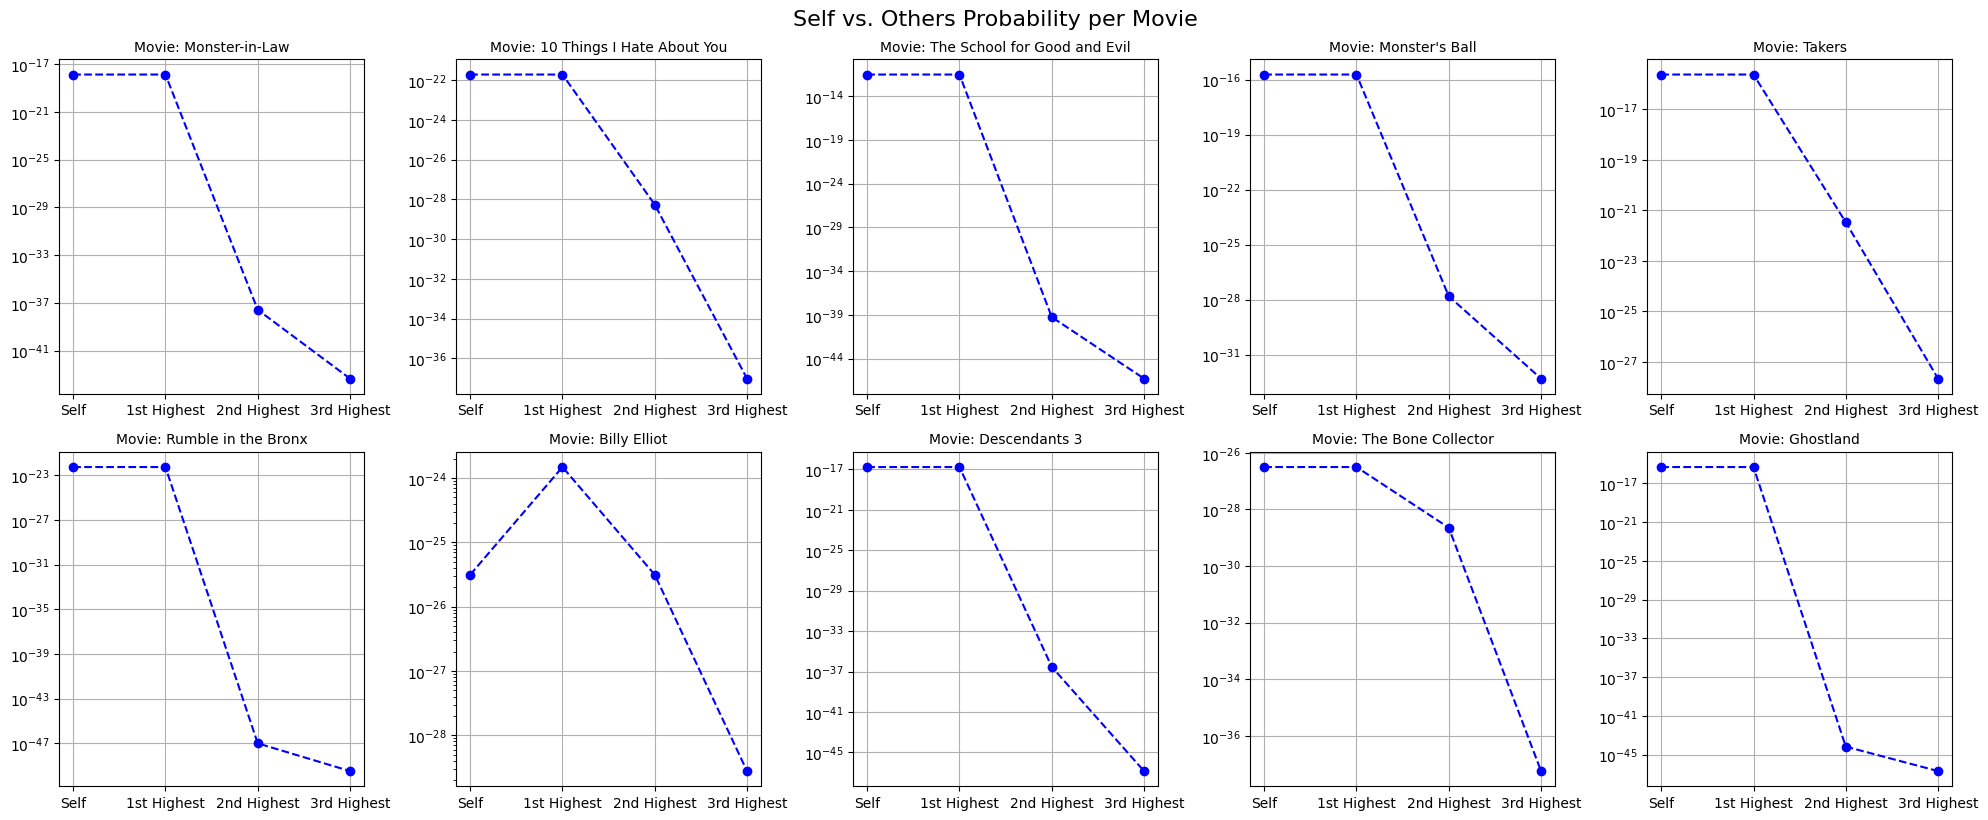

In [15]:
def plot_self_confidence_grid(model, X, df, sample_size=10, per_row=5):
    indices = np.random.choice(range(len(df)), size=sample_size, replace=False)
    n_rows = int(np.ceil(sample_size / per_row))

    fig, axs = plt.subplots(n_rows, per_row, figsize=(per_row * 4, n_rows * 4))
    axs = axs.flatten()  # flatten to 1D for easy indexing

    for plot_idx, movie_idx in enumerate(indices):
        y = np.zeros(len(df))
        y[movie_idx] = 1.0  # mark current movie as the only "positive"

        model.fit(X, y)
        log_probs = model.predict_log_proba(X)
        probs = [np.exp(lp[1.0]) for lp in log_probs]

        sorted_probs = sorted(probs, reverse=True)
        self_prob = probs[movie_idx]
        first_prob = sorted_probs[0]
        second_prob = sorted_probs[1]
        third_prob = sorted_probs[2]

        ax = axs[plot_idx]
        ax.plot(['Self','1st Highest', '2nd Highest', '3rd Highest'],
                [self_prob, first_prob, second_prob, third_prob],
                marker='o', linestyle='--', color='blue')

        ax.set_title(f"Movie: {df.iloc[movie_idx]['title']}", fontsize=10)
        ax.set_yscale('log')
        # ax.set_ylim(min_prob, 1)
        ax.grid(True)

    # Hide unused subplots
    for i in range(sample_size, len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.suptitle("Self vs. Others Probability per Movie", fontsize=16, y=1.02)
    plt.show()

# Instantiate your model
model = MultinomialNaiveBayes()

# Plot 10 randomly selected movies in a 2x5 grid. We can keep sample size different than 10.
plot_self_confidence_grid(model, final_feature_matrix, df, sample_size=10, per_row=5)


C:\Users\yuvra\AppData\Local\Temp\ipykernel_5784\1338260261.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="rocket")


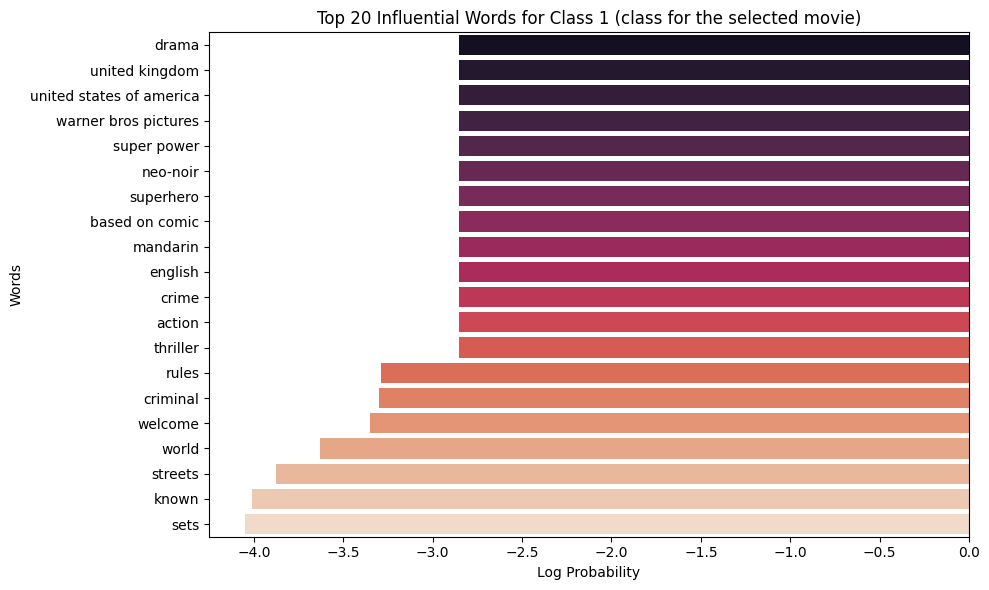

In [14]:
def plot_top_influential_words(model,X,df,favorite_movie_name, vectorizer, class_label=1.0, top_n=20):
    # Get index of favorite movie
    favorite_index = df[df['title'].str.lower() == favorite_movie_name.lower()].index[0]
    
    # Fit model using favorite movie
    y = np.zeros(len(df))
    y[favorite_index] = 1.0
    model.fit(X, y)

    log_probs = model.feature_log_prob[class_label]
    vocab = np.array(vectorizer.columns)
    
    # Sort by log prob
    top_indices = np.argsort(log_probs)[::-1][:top_n]
    top_words = vocab[top_indices]
    top_scores = log_probs[top_indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_scores, y=top_words, palette="rocket")
    plt.title(f"Top {top_n} Influential Words for Class {class_label} (class for the selected movie)")
    plt.xlabel("Log Probability")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

model = MultinomialNaiveBayes()

# We can change movie name in place of "The Dark Knight" below ( make sure it is in our dataframe's dataset )
plot_top_influential_words(model,final_feature_matrix,df,"The Dark Knight", final_df.drop(['title', 'imdb_id'], axis = 'columns'), 1,20)